In [1]:
#Import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from pandas import *

In [2]:
#Loading data
df = pd.read_csv('../data/rfm.csv', encoding = 'utf-8',index_col=None, sep = '\t')
df.head()

,CustomerID,frequency,monetary_value,recency,r_quartile,f_quartile,m_quartile
0,12820.0,59,942.34,3,1,2,2
1,12821.0,6,92.72,214,4,4,4
2,12822.0,46,948.88,70,3,2,2
3,12823.0,5,1759.50,74,3,4,1
4,12824.0,25,397.12,59,3,3,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 7 columns):
CustomerID        3521 non-null float64
frequency         3521 non-null int64
monetary_value    3521 non-null float64
recency           3521 non-null int64
r_quartile        3521 non-null int64
f_quartile        3521 non-null int64
m_quartile        3521 non-null int64
dtypes: float64(2), int64(5)
memory usage: 192.6 KB


In [54]:
X = df.iloc[:, 1:7]

In [55]:
#Train, val and test split
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(X, test_size=0.3)

X_val, X_test = train_test_split(X_val, test_size=0.3)

In [56]:
#Standardization of our datas
from sklearn.preprocessing import StandardScaler
import pickle

# Create scaler object
scaler = StandardScaler() 
#Fit scalar object to our train set
scaler.fit(X_train)

#Save the model
#filename = 'standardization.pkl'
#pickle.dump(scaler, open(filename, 'wb'))

#Transform train, val and test into standardize datas
X_train = pd.DataFrame(scaler.transform(X_train))
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/home/celiabayet/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/home/celiabayet/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/home/celiabayet/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [69]:
#from sklearn.model_selection import KFold

#kf = KFold(n_splits=5)
#print(kf.split(X))
#kf.get_n_splits(X)
#for train_index, test_index in kf.split(X):
#   X_train_fold, X_test_fold = X[train_index], X[test_index]


In [59]:
from sklearn import cluster, metrics
from sklearn.cluster import KMeans

wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_train)
    kmeans.predict(X_val)
    wcss.append(kmeans.inertia_)
    
silhouettes = []
for i in range(2,30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_train)
    cluster = kmeans.predict(X_val)
    silh = metrics.silhouette_score(X_val, cluster)
    silhouettes.append(silh)

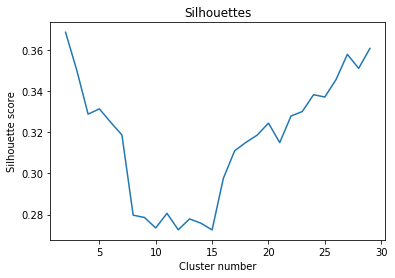

In [61]:
plt.plot(range(2,30), silhouettes)
plt.title('Silhouettes')
plt.xlabel('Cluster number')
plt.ylabel('Silhouette score')
plt.show()

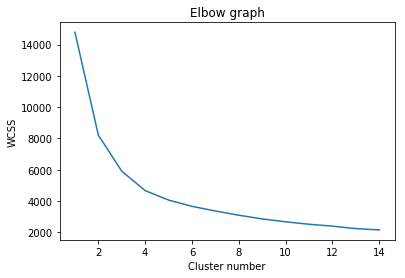

In [22]:
plt.plot(range(1,15), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [68]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(X_train)
#clusters = kmeans.fit_predict(X)
cluster_test = kmeans.predict(X_test)
print(metrics.silhouette_score(X_test,cluster_test))
df['clusters'] = clusters
df.sample(10)

0.34501823710448803


,CustomerID,frequency,monetary_value,recency,r_quartile,f_quartile,m_quartile,clusters
2428,16589.0,33,459.24,71,3,3,3,1
3133,17680.0,11,184.40,23,2,4,4,1
2899,17325.0,6,96.80,280,4,4,4,1
2658,16948.0,18,399.02,138,3,3,3,1
2374,16498.0,15,100.97,161,4,4,4,1
3068,17588.0,23,1240.20,100,3,3,2,3
1881,15754.0,28,458.57,51,3,3,3,1
1304,14882.0,11,589.70,26,2,4,3,3
2286,16372.0,97,367.93,33,2,2,3,1
234,13203.0,57,869.46,9,1,2,2,3


In [84]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5,0,'Monetary')

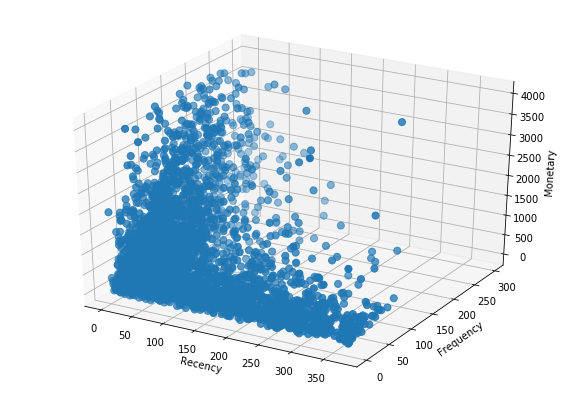

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.recency, df.frequency, df.monetary_value, s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

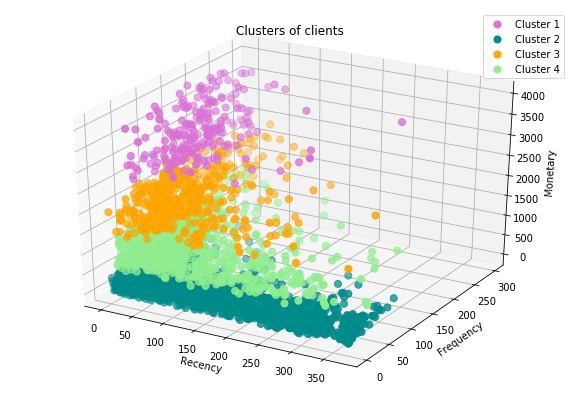

In [44]:
fig = plt.figure(figsize=(10,7))
dx = fig.add_subplot(111, projection='3d')
colors = ['orchid','darkcyan', 'orange', 'lightgreen']

for i in range(0,4):
    dx.scatter(df[df.clusters == i].recency, 
               df[df.clusters == i].frequency, 
               df[df.clusters == i].monetary_value, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

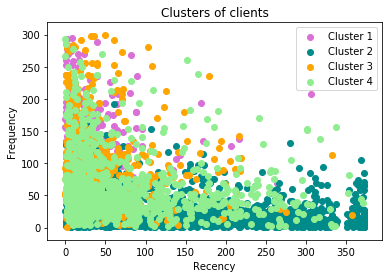

In [45]:
c1 = df[df.clusters == 0]
c2 = df[df.clusters == 1]
c3 = df[df.clusters == 2]
c4 = df[df.clusters == 3]

plt.scatter(c1.recency, c1.frequency, c = 'orchid', label = 'Cluster 1')
plt.scatter(c2.recency, c2.frequency, c = 'darkcyan', label = 'Cluster 2')
plt.scatter(c3.recency, c3.frequency, c =  'orange', label = 'Cluster 3')
plt.scatter(c4.recency, c4.frequency, c =  'lightgreen', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

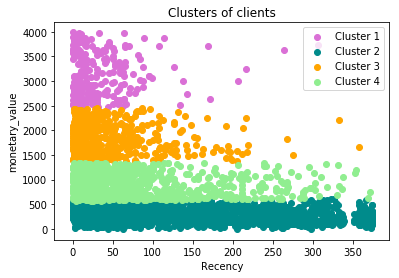

In [46]:
c1 = df[df.clusters == 0]
c2 = df[df.clusters == 1]
c3 = df[df.clusters == 2]
c4 = df[df.clusters == 3]

plt.scatter(c1.recency, c1.monetary_value, c = 'orchid', label = 'Cluster 1')
plt.scatter(c2.recency, c2.monetary_value, c = 'darkcyan', label = 'Cluster 2')
plt.scatter(c3.recency, c3.monetary_value, c =  'orange', label = 'Cluster 3')
plt.scatter(c4.recency, c4.monetary_value, c =  'lightgreen', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('monetary_value')
plt.legend()

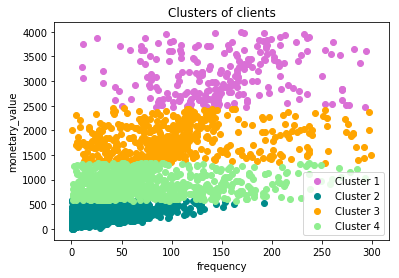

In [47]:
c1 = df[df.clusters == 0]
c2 = df[df.clusters == 1]
c3 = df[df.clusters == 2]
c4 = df[df.clusters == 3]

plt.scatter(c1.frequency, c1.monetary_value, c = 'orchid', label = 'Cluster 1')
plt.scatter(c2.frequency, c2.monetary_value, c = 'darkcyan', label = 'Cluster 2')
plt.scatter(c3.frequency, c3.monetary_value, c =  'orange', label = 'Cluster 3')
plt.scatter(c4.frequency, c4.monetary_value, c =  'lightgreen', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('frequency')
plt.ylabel('monetary_value')
plt.legend()

plt.show()

In [48]:
from sklearn.decomposition import PCA

pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
X_trans = pca.transform(X_train)

pca.explained_variance_ratio_.cumsum()

NameError: name 'decomposition' is not defined

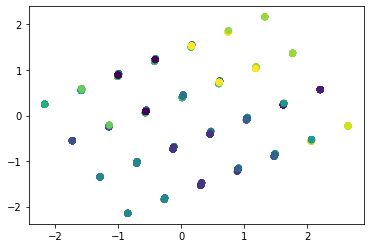

In [109]:
plt.scatter(X_trans[:,0],X_trans[:,1], c=kmeans.labels_)

In [ ]:
cluster_val = kmeans.predict(X_val)